In [35]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split



In [36]:
# Load Data
titanic = sns.load_dataset('titanic')
print("\nFirst few rows of the dataset:")
print(titanic.head())

print("\nDataset Info:")
print(titanic.info())




First few rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       ------

In [37]:
# Create Artificial Missing Values (for demonstration)
# We don't need to create artificial missing values as Titanic dataset already has some
print("\nMissing values in the dataset:")
print(titanic.isnull().sum())




Missing values in the dataset:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [38]:
# Handle Missing Values
df = titanic.copy()

# Fill numeric missing values
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

# Fill categorical missing values
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['deck'] = df['deck'].fillna('Unknown')

print("\nMissing values after handling:")
print(df.isnull().sum())



TypeError: Cannot setitem on a Categorical with a new category (Unknown), set the categories first

In [39]:
# Handle Outliers
# Handle outliers in numeric columns
for column in ['age', 'fare']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)



In [40]:
# Cell 6: Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())




Descriptive Statistics:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.039282    0.523008    0.381594   24.046813
std      0.486592    0.836071   12.072074    1.102743    0.806057   20.481625
min      0.000000    1.000000    2.500000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   54.500000    8.000000    6.000000   65.634400


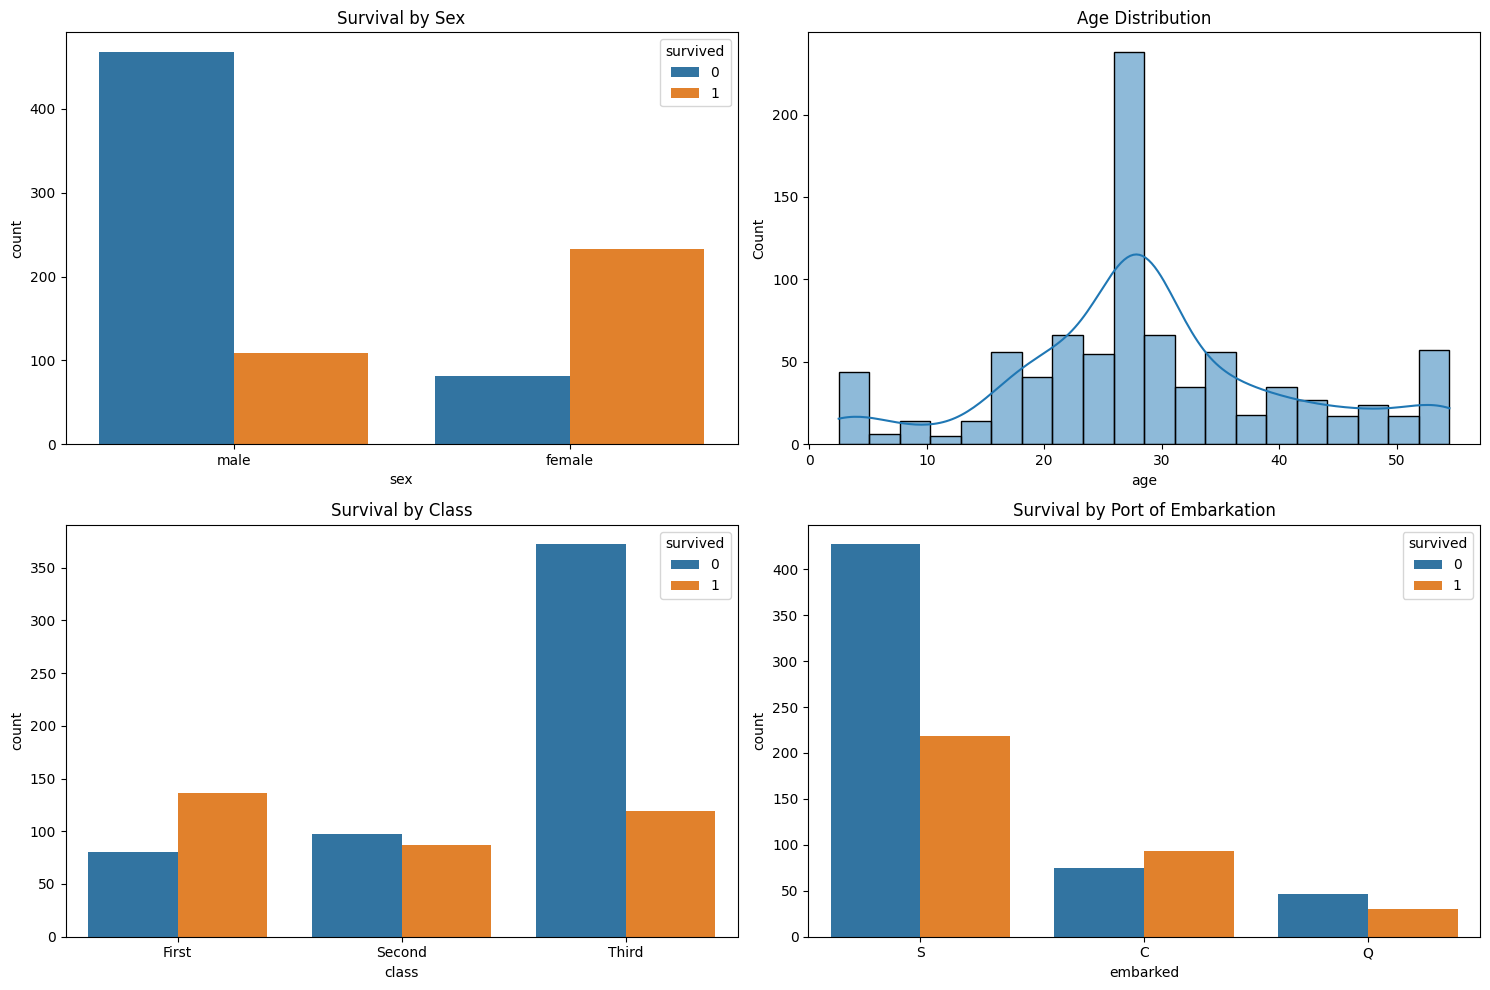

In [41]:
#  Visualizations
plt.figure(figsize=(15, 10))

# Survival by Sex
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Sex')

# Age Distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='age', kde=True)
plt.title('Age Distribution')

# Survival by Class
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='class', hue='survived')
plt.title('Survival by Class')

# Survival by Embarked
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='embarked', hue='survived')
plt.title('Survival by Port of Embarkation')

plt.tight_layout()
plt.show()



In [42]:
# Label Encoding
df_processed = df.copy()

# Function to label encode a column and return mapping
def label_encode_column(data, column):
    le = LabelEncoder()
    data[f'{column}_encoded'] = le.fit_transform(data[column])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    return mapping

# Identify categorical columns
categorical_columns = ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']

# Store encoding mappings
encoding_mappings = {}

# Apply label encoding to all categorical columns
for col in categorical_columns:
    encoding_mappings[col] = label_encode_column(df_processed, col)

# Print encoding mappings
print("\nLabel Encoding Mappings:")
for col, mapping in encoding_mappings.items():
    print(f"\n{col} encoding:")
    for category, code in mapping.items():
        print(f"{category} -> {code}")




Label Encoding Mappings:

sex encoding:
female -> 0
male -> 1

embarked encoding:
C -> 0
Q -> 1
S -> 2

class encoding:
First -> 0
Second -> 1
Third -> 2

who encoding:
child -> 0
man -> 1
woman -> 2

deck encoding:
A -> 0
B -> 1
C -> 2
D -> 3
E -> 4
F -> 5
G -> 6
nan -> 7

embark_town encoding:
Cherbourg -> 0
Queenstown -> 1
Southampton -> 2
nan -> 3

alive encoding:
no -> 0
yes -> 1


In [43]:
#  Scaling
# Identify numeric columns for scaling (excluding encoded columns)
numeric_columns = ['age', 'fare']

# Scale numeric features
scaler = StandardScaler()
df_processed[numeric_columns] = scaler.fit_transform(df_processed[numeric_columns])

# Display results
print("\nFirst few rows of processed data (including encoded features):")
print(df_processed.head())



First few rows of processed data (including encoded features):
   survived  pclass     sex       age  sibsp  parch      fare embarked  class  \
0         0       3    male -0.583432      1      0 -0.820552        S  Third   
1         1       1  female  0.742685      1      0  2.031623        C  First   
2         1       3  female -0.251903      0      0 -0.787578        S  Third   
3         1       1  female  0.494038      1      0  1.419297        S  First   
4         0       3    male  0.494038      0      0 -0.781471        S  Third   

     who  ...  embark_town alive  alone sex_encoded  embarked_encoded  \
0    man  ...  Southampton    no  False           1                 2   
1  woman  ...    Cherbourg   yes  False           0                 0   
2  woman  ...  Southampton   yes   True           0                 2   
3  woman  ...  Southampton   yes  False           0                 2   
4    man  ...  Southampton    no   True           1                 2   

   class_e

In [44]:
# Display features created
print("\nList of all features after encoding and preprocessing:")
print(df_processed.columns.tolist())

# Save encoding mappings for future use
encoding_mappings_df = pd.DataFrame([{f"{col}_{category}": code
                                    for col, mapping in encoding_mappings.items()
                                    for category, code in mapping.items()}],
                                   index=['encoding'])
print("\nEncoding mappings as DataFrame:")
print(encoding_mappings_df)




List of all features after encoding and preprocessing:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone', 'sex_encoded', 'embarked_encoded', 'class_encoded', 'who_encoded', 'deck_encoded', 'embark_town_encoded', 'alive_encoded']

Encoding mappings as DataFrame:
          sex_female  sex_male  embarked_C  embarked_Q  embarked_S  \
encoding           0         1           0           1           2   

          class_First  class_Second  class_Third  who_child  who_man  ...  \
encoding            0             1            2          0        1  ...   

          deck_E  deck_F  deck_G  deck_nan  embark_town_Cherbourg  \
encoding       4       5       6         7                      0   

          embark_town_Queenstown  embark_town_Southampton  embark_town_nan  \
encoding                       1                        2                3   

          alive_no  alive_yes  
encoding         0

In [46]:
encoding_mappings_df.head()

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,...,deck_E,deck_F,deck_G,deck_nan,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alive_no,alive_yes
encoding,0,1,0,1,2,0,1,2,0,1,...,4,5,6,7,0,1,2,3,0,1


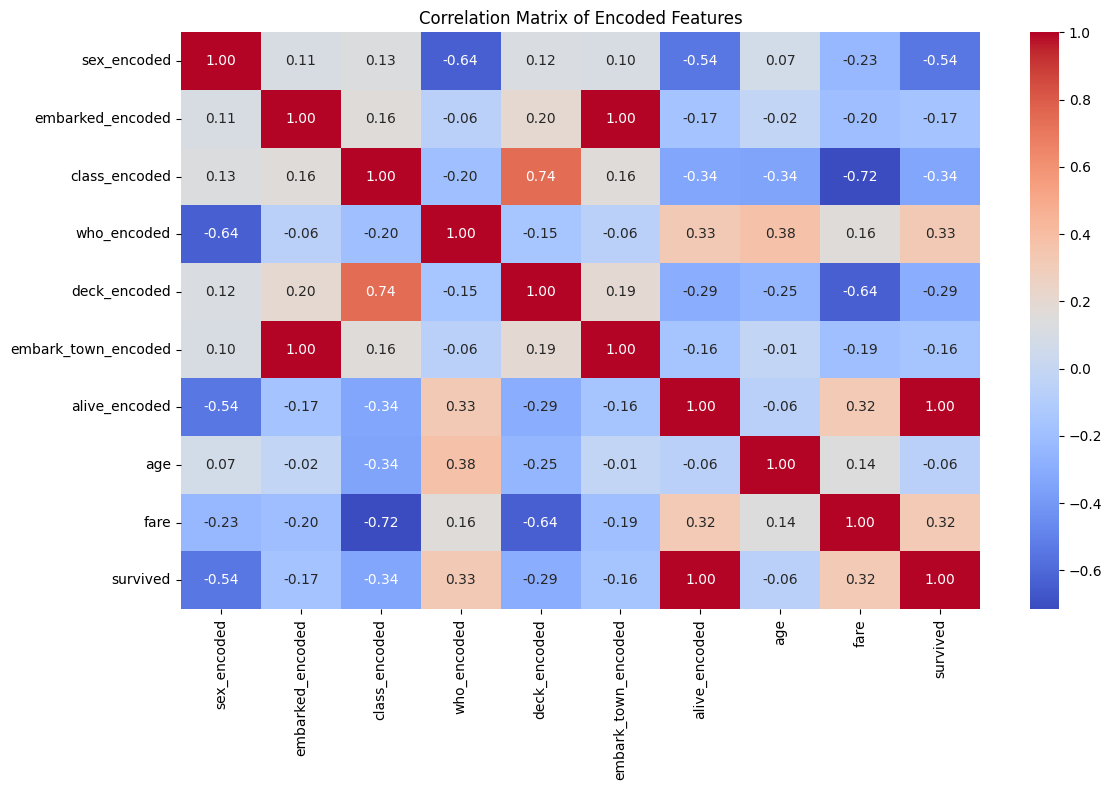

In [45]:
# Additional analysis: Show correlation between encoded features
encoded_cols = [col for col in df_processed.columns if col.endswith('_encoded')]
numeric_cols = ['age', 'fare', 'survived']
correlation_cols = encoded_cols + numeric_cols

plt.figure(figsize=(12, 8))
sns.heatmap(df_processed[correlation_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Encoded Features')
plt.tight_layout()
plt.show()